### Download data
https://drivingstereo-dataset.github.io/

In [9]:
# !unzip 'data/2018-07-10-09-54-03.zip' -d left
#!unzip  'data/2018-07-10-09-54-03 (1).zip' -d right
#!unzip  'data/2018-07-10-09-54-03 (2).zip' -d depth

In [1]:
%gui qt

In [2]:
def create_bev_image(
        image_size,
        points,
        path_to_save="bev.png"
):
    truncated_points = points
    y_img = truncated_points[:, 0]
    x_img = -truncated_points[:, 1]
    pixels = truncated_points[:, 0]

    xy = truncated_points[:, :-1]
    dist = np.linalg.norm(xy, axis=-1)
    
    
    fig, ax = plt.subplots(figsize=(2000 / 200, 2000 / 200), dpi=100)
    ax.scatter(x_img, y_img, s=1, c=dist, alpha=1.0, cmap='jet')
    
    ax.scatter([0], [0], s=5, alpha=1.0, color=(0.5, 0.5, 0.5))
    ax.set_facecolor((1.0, 1.0, 1.0))
    ax.axis('scaled')

    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    plt.savefig(path_to_save, bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    
    
import numpy as np
import vispy.scene
from vispy.scene import visuals

def draw_pcl(pcl, camera_type='fly'):

    canvas = vispy.scene.SceneCanvas(keys='interactive', show=True)
    view = canvas.central_widget.add_view()

    # create scatter object and fill in the data
    scatter = visuals.Markers()
    scatter.set_data(pcl * 100, edge_width=0, face_color=(1, 1, 1, .5), size=3)

    view.add(scatter)
    if camera_type == 'fly':
        view.camera = vispy.scene.FlyCamera(fov=90., center=[0.0, 0.0, 0.0])
    elif camera_type == 'turntable':
        view.camera = vispy.scene.TurntableCamera(fov=90., center=[0.0, 0.0, 0.0], name='fly', elevation=0.0, azimuth=0.0)
        
    axis = visuals.XYZAxis(parent=view.scene)
    vispy.app.run()    

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [4]:
names = list(map(lambda x: x.rstrip(".jpg"), os.listdir("test_depth_data/left_small")))

In [5]:
with open("test_depth_data/intrinsics.txt") as fr:
    lines = fr.read().split('\n')

K = None
for line in lines:
    if line.startswith('K_101: '):
        line = line.lstrip('K_101: ')
        K = np.array(list(map(float, line.split()))).reshape(3, 3)
assert K is not None

In [6]:
from utils import depth_to_pcl

In [10]:
for name in names:
    print(name)

2018-07-10-09-54-03_2018-07-10-10-06-55-366
2018-07-10-09-54-03_2018-07-10-10-11-27-184
2018-07-10-09-54-03_2018-07-10-10-07-25-803
2018-07-10-09-54-03_2018-07-10-10-10-26-829
2018-07-10-09-54-03_2018-07-10-10-25-00-147
2018-07-10-09-54-03_2018-07-10-10-10-10-519
2018-07-10-09-54-03_2018-07-10-10-07-45-423
2018-07-10-09-54-03_2018-07-10-10-17-17-350


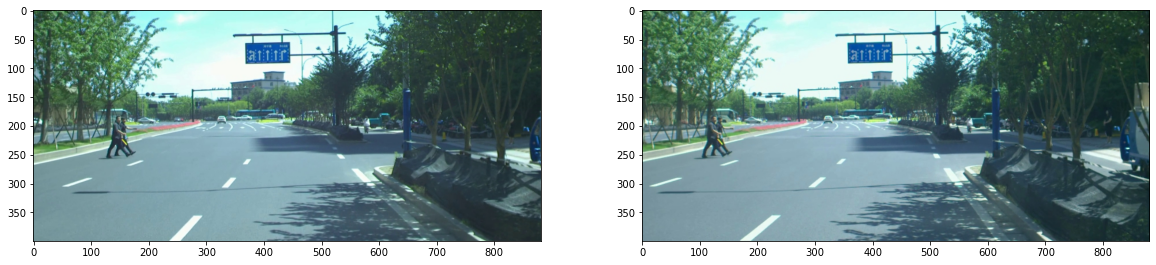

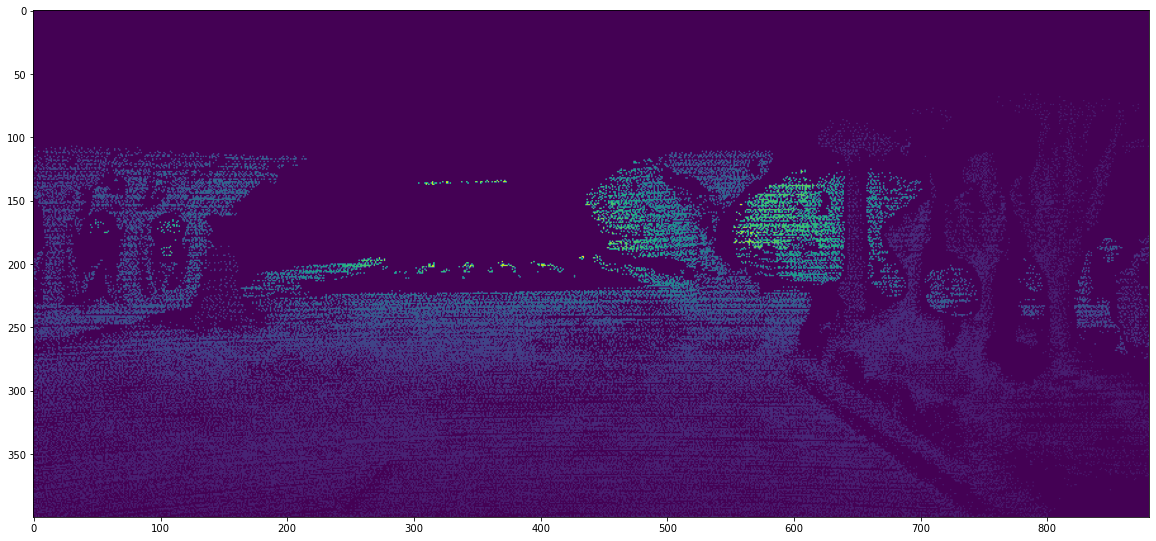

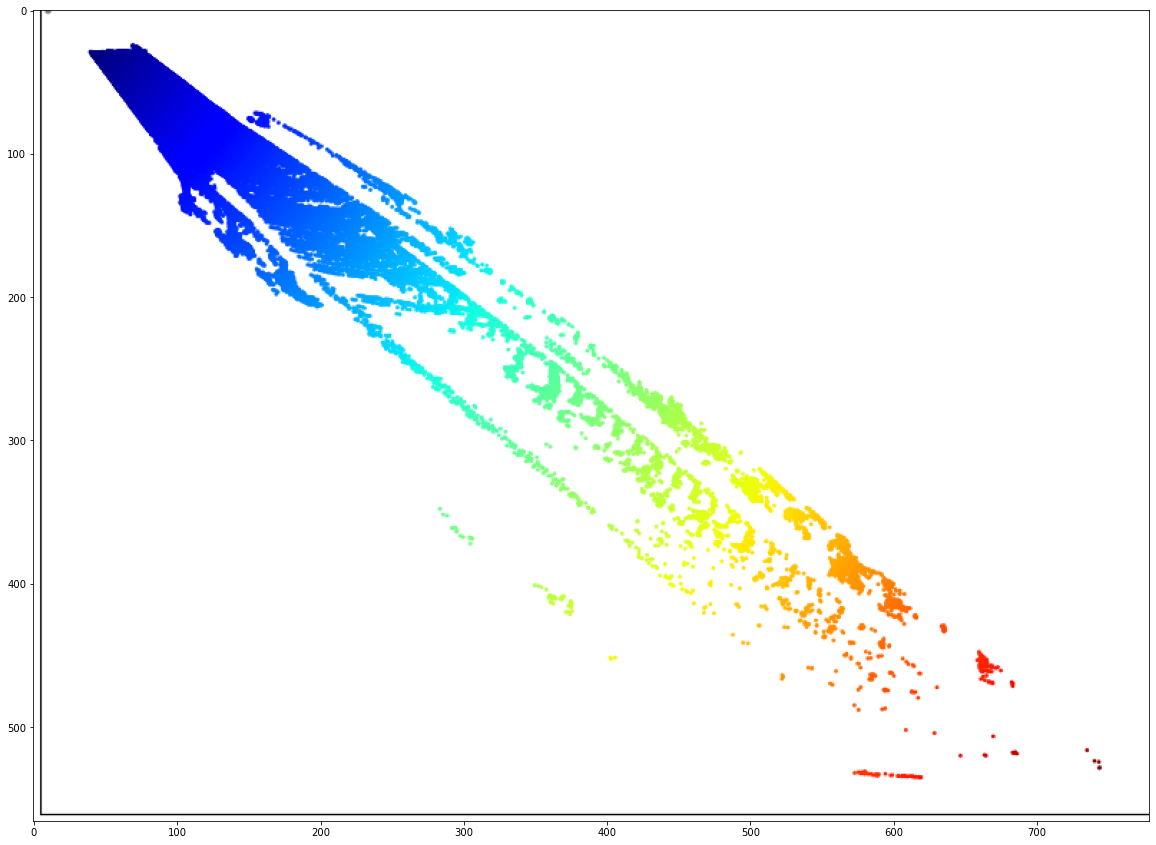

In [12]:
name = '2018-07-10-09-54-03_2018-07-10-10-25-00-147'
im_path = f"{name}.jpg"
d_path  = f"{name}.png"
left = plt.imread(f"left/{im_path}")
right = plt.imread(f"right/{im_path}")
depth = plt.imread(f"depth/{d_path}")

f, (ax1, ax2) = plt.subplots(ncols=2)
f.set_figheight(10)
f.set_figwidth(20)
ax1.imshow(left)
ax2.imshow(right)
plt.show()
f = plt.figure(figsize=(10, 20))
f.set_figheight(10)
f.set_figwidth(20)
plt.imshow(depth)
plt.show()

pcl = depth_to_pcl(depth, K)
create_bev_image((1000, 1000), pcl, "bev.png")

bev_im = plt.imread("bev.png")
plt.figure(figsize=(20, 16))
plt.imshow(bev_im)
plt.show()

draw_pcl(pcl)